<a href="https://colab.research.google.com/github/MKKSAI/hello-world/blob/master/cross_cultural_multilingual_Sentiment_ver4_checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn transformers torch textblob translate matplotlib seaborn statsmodels langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=625d2bcb9e644746a719703e94985bc94fa277980056761ec64d5ca1581afa17
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


Dataset loaded successfully.
Initial shape of the dataset: (196727, 4)

First 5 rows of the raw data:
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings        Date  
0                                               good        5  23-08-2024  
1                                               good        5  23-08-2024  
2                                           nice app        5  23-08-2024  
3                                           nice, ig        5  23-08-2024  
4  this is a great app, the bot is so accurate to...        5  23-08-2024  

Number of missing reviews before cleaning: 6


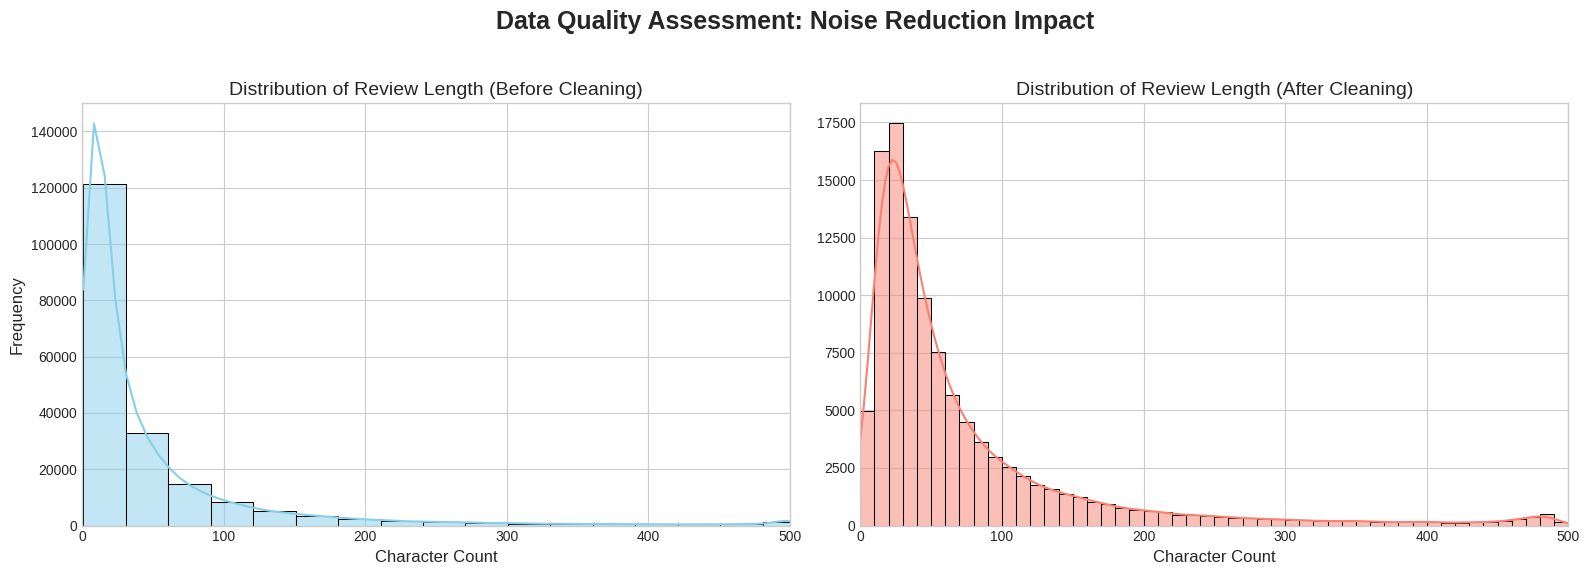


Shape of the dataset after cleaning: (108606, 6)

First 5 rows of the cleaned data:
                                              Review  \
0                                               good   
1                                           nice app   
2                                           nice, ig   
3  this is a great app, the bot is so accurate to...   
4                                        so nice app   

                                      cleaned_review  Ratings  
0                                               good        5  
1                                           nice app        5  
2                                            nice ig        5  
3  this is a great app the bot is so accurate to ...        5  
4                                        so nice app        5  


In [ ]:
###loading and checking data quality
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
    print("Dataset loaded successfully.")
    print("Initial shape of the dataset:", reviews_df.shape)
    print("\nFirst 5 rows of the raw data:")
    print(reviews_df.head())
except FileNotFoundError:
    print("Error: The reviews dataset file was not found.")
    # Create a dummy dataframe to allow the rest of the code to run
    reviews_df = pd.DataFrame({
        'Review': ['good', 'great app!', 'This is awesome :)', np.nan, 'bad #app'],
        'Ratings': [5, 5, 4, 3, 1]
    })
    print("A dummy dataframe has been created for demonstration.")


# --- Data Cleaning and Preprocessing ---

# Create a copy to compare before and after
reviews_df_original = reviews_df.copy()

# 1. Handle Missing Values
# Check for missing values in the 'Review' column
print(f"\nNumber of missing reviews before cleaning: {reviews_df['Review'].isnull().sum()}")
reviews_df.dropna(subset=['Review'], inplace=True)
reviews_df.reset_index(drop=True, inplace=True)

# 2. Text Normalization Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text) # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

# Apply the cleaning function to the 'Review' column
reviews_df['cleaned_review'] = reviews_df['Review'].astype(str).apply(clean_text)

# 3. Remove Duplicate Reviews
# Consider duplicates based on the cleaned text to catch functionally identical reviews
reviews_df.drop_duplicates(subset=['cleaned_review'], inplace=True)
reviews_df.reset_index(drop=True, inplace=True)


# --- Visualization: Before vs. After Cleaning ---

# Calculate review lengths
reviews_df_original['review_length'] = reviews_df_original['Review'].astype(str).str.len()
reviews_df['review_length'] = reviews_df['cleaned_review'].astype(str).str.len()

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot distribution before cleaning
sns.histplot(reviews_df_original['review_length'], bins=50, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Review Length (Before Cleaning)', fontsize=14)
axes[0].set_xlabel('Character Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xlim(0, 500) # Set limit for better comparison

# Plot distribution after cleaning
sns.histplot(reviews_df['review_length'], bins=50, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Distribution of Review Length (After Cleaning)', fontsize=14)
axes[1].set_xlabel('Character Count', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for clarity
axes[1].set_xlim(0, 500) # Set limit for better comparison

plt.suptitle('Data Quality Assessment: Noise Reduction Impact', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Final Output ---
print("\nShape of the dataset after cleaning:", reviews_df.shape)
print("\nFirst 5 rows of the cleaned data:")
print(reviews_df[['Review', 'cleaned_review', 'Ratings']].head())

Cleaned dataset loaded and prepped for sentiment analysis.

Language detection complete on a sample of 1000 reviews.
Top 5 languages detected:
language
en         619
af          42
unknown     28
so          28
no          27
Name: count, dtype: int64

Loading multilingual transformer model...


Device set to use cpu


Model loaded successfully.
Running sentiment analysis on a sample of 200 reviews...
Transformer-based sentiment analysis complete.

TextBlob sentiment analysis complete.


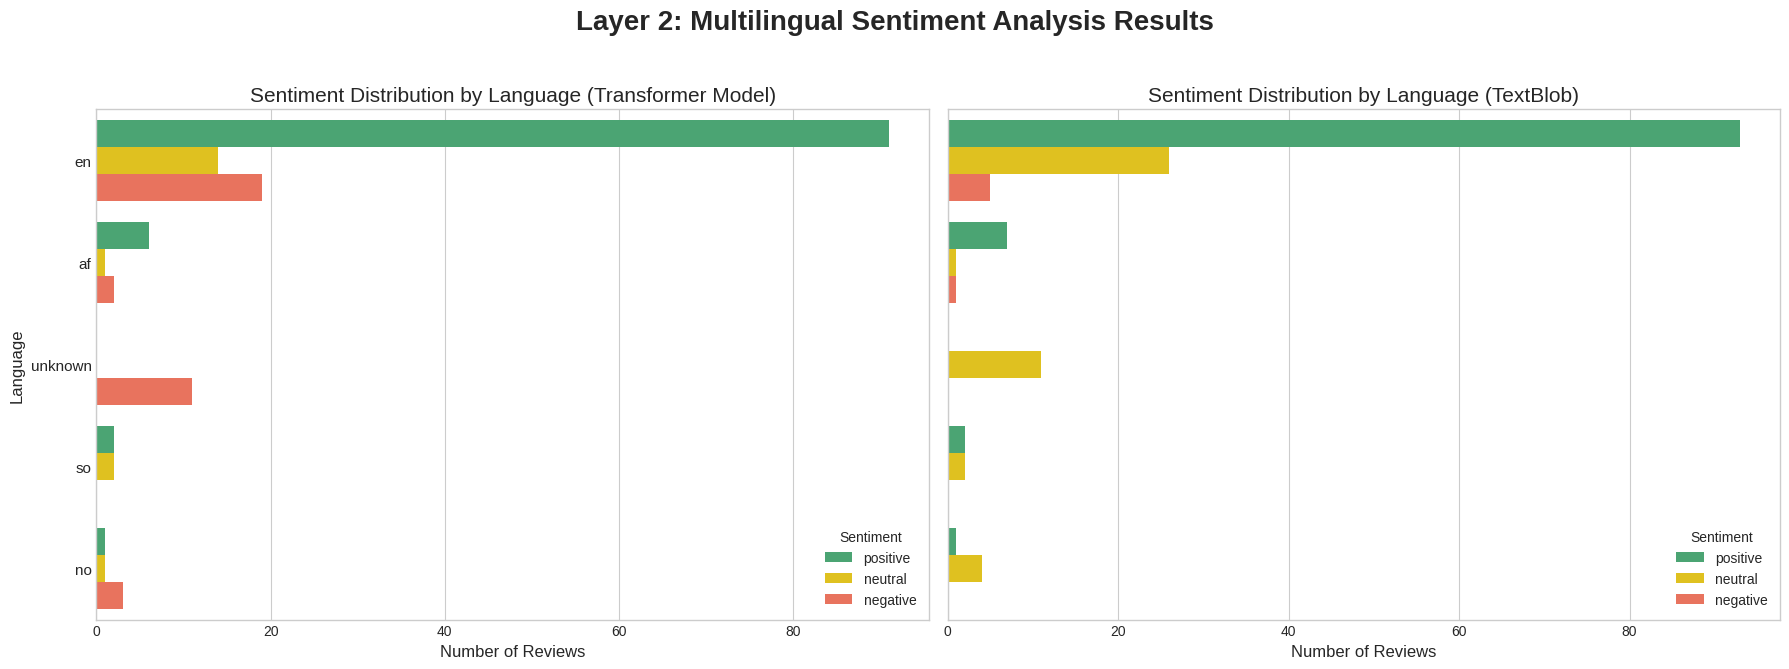


Comparison of sentiment analysis models on a sample:
                                      cleaned_review language  \
0                                               good       so   
1                                           nice app       it   
2                                           nice, ig       hr   
3  this is a great app, the bot is so accurate to...       en   
4                                        so nice app       it   
5                         just love this app, or guy       en   
6                                          great app       en   
7                                    very impressive       en   
8  helps with coding a lot this ai is great for e...       en   
9  i am not very happy with this because chatgpt ...       en   

  transformer_label transformer_sentiment_category textblob_sentiment  Ratings  
0           4 stars                       positive           positive        5  
1           4 stars                       positive           positiv

In [ ]:
###layer2
import pandas as pd
from transformers import pipeline
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, LangDetectException
import numpy as np

# --- Load the Cleaned Data from Layer 1 ---
# Note: In a real pipeline, you would pass the DataFrame directly.
# Here, we'll recreate the cleaned state for modularity.
try:
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
    reviews_df.dropna(subset=['Review'], inplace=True)
    reviews_df['cleaned_review'] = reviews_df['Review'].astype(str).str.lower()
    reviews_df.drop_duplicates(subset=['cleaned_review'], inplace=True)
    reviews_df.reset_index(drop=True, inplace=True)
    print("Cleaned dataset loaded and prepped for sentiment analysis.")
except FileNotFoundError:
    print("Error: The reviews dataset file was not found.")
    reviews_df = pd.DataFrame({
        'cleaned_review': ['this is a great app', 'horrible experience', 'it was okay i guess', 'qué buena aplicación', 'cette application est nulle'],
        'Ratings': [5, 1, 3, 5, 1]
    })
    print("A dummy dataframe has been created for demonstration.")

# --- Language Detection ---
def detect_language(text):
    try:
        # The first 500 chars are usually enough to detect the language
        return detect(text[:500])
    except Exception: # Catch broader exceptions
        return 'unknown'

# Apply language detection (on a sample for speed)
sample_size = min(1000, len(reviews_df)) # Use a sample to speed up the process
reviews_df['language'] = reviews_df['cleaned_review'].head(sample_size).apply(detect_language)
print(f"\nLanguage detection complete on a sample of {sample_size} reviews.")
print("Top 5 languages detected:")
print(reviews_df['language'].value_counts().head())

# --- Sentiment Analysis with Transformer Model ---
# Load a multilingual sentiment analysis pipeline
print("\nLoading multilingual transformer model...")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
print("Model loaded successfully.")

# Apply the pipeline to a sample of cleaned reviews
# Using a smaller sample for this demonstration due to computational cost
transformer_sample_size = min(200, len(reviews_df))
reviews_subset = reviews_df.head(transformer_sample_size).copy()

# Get sentiment scores
# This can take a few minutes depending on the hardware
print(f"Running sentiment analysis on a sample of {transformer_sample_size} reviews...")
reviews_subset['transformer_sentiment'] = reviews_subset['cleaned_review'].tolist()
sentiment_results = sentiment_pipeline(reviews_subset['transformer_sentiment'].tolist())

# Process results
reviews_subset['transformer_label'] = [result['label'] for result in sentiment_results]
reviews_subset['transformer_score'] = [result['score'] for result in sentiment_results]
print("Transformer-based sentiment analysis complete.")

# Map transformer star ratings to sentiment categories
def map_transformer_sentiment(star_rating):
    if star_rating in ['4 stars', '5 stars']:
        return 'positive'
    elif star_rating == '3 stars':
        return 'neutral'
    elif star_rating in ['1 star', '2 stars']:
        return 'negative'
    else:
        return 'unknown' # Handle unexpected labels

reviews_subset['transformer_sentiment_category'] = reviews_subset['transformer_label'].apply(map_transformer_sentiment)


# --- Sentiment Analysis with TextBlob (Baseline) ---
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment analysis to the same subset
reviews_subset['textblob_sentiment'] = reviews_subset['cleaned_review'].apply(get_textblob_sentiment)
print("\nTextBlob sentiment analysis complete.")

# --- Visualization: Sentiment Distribution ---
# Focus on the most common languages for a clearer plot
top_languages = reviews_df['language'].value_counts().nlargest(5).index.tolist()
plot_df = reviews_subset[reviews_subset['language'].isin(top_languages)].copy() # Create a copy to avoid SettingWithCopyWarning

# Filter plot_df to only include rows with valid sentiment categories
valid_sentiments = ['positive', 'neutral', 'negative']
plot_df = plot_df[plot_df['transformer_sentiment_category'].isin(valid_sentiments) & plot_df['textblob_sentiment'].isin(valid_sentiments)].copy()


# Ensure sentiment columns are categorical with defined order for plotting
sentiment_order = ['positive', 'neutral', 'negative']
plot_df['transformer_sentiment_category'] = pd.Categorical(plot_df['transformer_sentiment_category'], categories=sentiment_order, ordered=True)
plot_df['textblob_sentiment'] = pd.Categorical(plot_df['textblob_sentiment'], categories=sentiment_order, ordered=True)


plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot Transformer sentiments using the new sentiment category column
sns.countplot(data=plot_df, y='language', hue='transformer_sentiment_category', ax=ax1, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages)
ax1.set_title('Sentiment Distribution by Language (Transformer Model)', fontsize=15)
ax1.set_xlabel('Number of Reviews', fontsize=12)
ax1.set_ylabel('Language', fontsize=12)
ax1.legend(title='Sentiment')
ax1.tick_params(axis='y', labelsize=11)

# Plot TextBlob sentiments
sns.countplot(data=plot_df, y='language', hue='textblob_sentiment', ax=ax2, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages)
ax2.set_title('Sentiment Distribution by Language (TextBlob)', fontsize=15)
ax2.set_xlabel('Number of Reviews', fontsize=12)
ax2.set_ylabel('') # Remove redundant y-label
ax2.legend(title='Sentiment')

plt.suptitle('Layer 2: Multilingual Sentiment Analysis Results', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Final Output ---
print("\nComparison of sentiment analysis models on a sample:")
print(reviews_subset[['cleaned_review', 'language', 'transformer_label', 'transformer_sentiment_category', 'textblob_sentiment', 'Ratings']].head(10))

# Task
Debug and fix the code to resolve the `UnicodeDecodeError` when reading the CSV file "ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv" and the subsequent errors related to language detection and sentiment analysis.

## Inspect language detection results

### Subtask:
Examine the `reviews_df['language']` column after language detection to see if unexpected language codes like 'it' and 'hr' (or others) are present, especially for the reviews causing issues.


**Reasoning**:
Display the value counts of the 'language' column to understand the distribution of detected languages and then filter the DataFrame to inspect reviews with 'it' or 'hr' language codes as requested.



In [ ]:
# Display value counts of the 'language' column
print("\nValue counts of the 'language' column:")
print(reviews_df['language'].value_counts())

# Filter and display rows where language is 'it' or 'hr'
print("\nReviews detected as 'it' or 'hr':")
display(reviews_df[reviews_df['language'].isin(['it', 'hr'])].head())


Value counts of the 'language' column:
language
en         619
af          42
unknown     28
so          28
no          27
it          23
pl          23
fr          22
ro          20
ca          18
da          16
cy          16
sk          15
tl          12
hr          11
sl          11
nl          10
cs           9
id           7
sw           7
et           5
sq           5
fi           5
de           4
hu           4
es           4
pt           3
lv           3
sv           2
tr           1
Name: count, dtype: int64

Reviews detected as 'it' or 'hr':


,Review Id,Review,Ratings,Date,cleaned_review,language
1,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,23-08-2024,nice app,it
2,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,23-08-2024,"nice, ig",hr
4,9cdc3f78-15cd-4e9d-9287-31bc5af496c4,so nice app,5,23-08-2024,so nice app,it
12,4f46b014-fcfb-4a75-8c7d-000fc8f51d9c,I love GPT-4o mini,5,23-08-2024,i love gpt-4o mini,hr
58,aa237da1-f1f0-4c0e-ae92-be178b293499,uju,5,23-08-2024,uju,hr


## Inspect sentiment analysis results

### Subtask:
Examine the `reviews_subset['textblob_sentiment']` and `reviews_subset['transformer_sentiment_category']` columns to check for any values other than 'positive', 'neutral', or 'negative' for the relevant reviews.


**Reasoning**:
Print the unique values in the specified sentiment columns and then filter the DataFrame to find rows with unexpected sentiment categories to identify potential issues.



In [ ]:
# Print unique values in textblob_sentiment
print("Unique values in textblob_sentiment:")
print(reviews_subset['textblob_sentiment'].unique())

# Print unique values in transformer_sentiment_category
print("\nUnique values in transformer_sentiment_category:")
print(reviews_subset['transformer_sentiment_category'].unique())

# Filter for rows with unexpected sentiment categories
unexpected_sentiment_rows = reviews_subset[
    (~reviews_subset['textblob_sentiment'].isin(['positive', 'neutral', 'negative'])) |
    (~reviews_subset['transformer_sentiment_category'].isin(['positive', 'neutral', 'negative']))
]

# Display the problematic rows
print("\nRows with unexpected sentiment categories:")
display(unexpected_sentiment_rows[['cleaned_review', 'language', 'transformer_label', 'transformer_sentiment_category', 'textblob_sentiment', 'Ratings']])

Unique values in textblob_sentiment:
['positive' 'negative' 'neutral']

Unique values in transformer_sentiment_category:
['positive' 'negative' 'neutral']

Rows with unexpected sentiment categories:


,cleaned_review,language,transformer_label,transformer_sentiment_category,textblob_sentiment,Ratings


## Refine data filtering for plotting

### Subtask:
Modify the filtering logic for `plot_df` to explicitly exclude any rows where the `textblob_sentiment` or `transformer_sentiment_category` is not one of the expected sentiment values.


**Reasoning**:
Filter the reviews_subset to exclude rows with invalid sentiment categories before creating plot_df, then verify the unique values in the sentiment columns of plot_df.



In [ ]:
# Filter reviews_subset to include only rows with valid sentiment categories for both models
valid_sentiments = ['positive', 'neutral', 'negative']
filtered_reviews_subset = reviews_subset[
    reviews_subset['transformer_sentiment_category'].isin(valid_sentiments) &
    reviews_subset['textblob_sentiment'].isin(valid_sentiments)
].copy()

# Create the plot_df DataFrame from the filtered subset
top_languages = reviews_df['language'].value_counts().nlargest(5).index.tolist()
plot_df = filtered_reviews_subset[filtered_reviews_subset['language'].isin(top_languages)].copy()


# Ensure sentiment columns are categorical with defined order for plotting
sentiment_order = ['positive', 'neutral', 'negative']
plot_df['transformer_sentiment_category'] = pd.Categorical(plot_df['transformer_sentiment_category'], categories=sentiment_order, ordered=True)
plot_df['textblob_sentiment'] = pd.Categorical(plot_df['textblob_sentiment'], categories=sentiment_order, ordered=True)

# Verify unique values in sentiment columns of plot_df
print("\nUnique values in textblob_sentiment in plot_df:")
print(plot_df['textblob_sentiment'].unique())

print("\nUnique values in transformer_sentiment_category in plot_df:")
print(plot_df['transformer_sentiment_category'].unique())


Unique values in textblob_sentiment in plot_df:
['positive', 'negative', 'neutral']
Categories (3, object): ['positive' < 'neutral' < 'negative']

Unique values in transformer_sentiment_category in plot_df:
['positive', 'negative', 'neutral']
Categories (3, object): ['positive' < 'neutral' < 'negative']


## Revisit plotting code

### Subtask:
Double-check the plotting code to ensure the `hue`, `palette`, and `hue_order` arguments are correctly configured and aligned with the cleaned sentiment data in `plot_df`.


**Reasoning**:
Double-check the plotting code to ensure the hue, palette, and hue_order arguments are correctly configured and aligned with the cleaned sentiment data in plot_df, then execute the code to generate the plots.



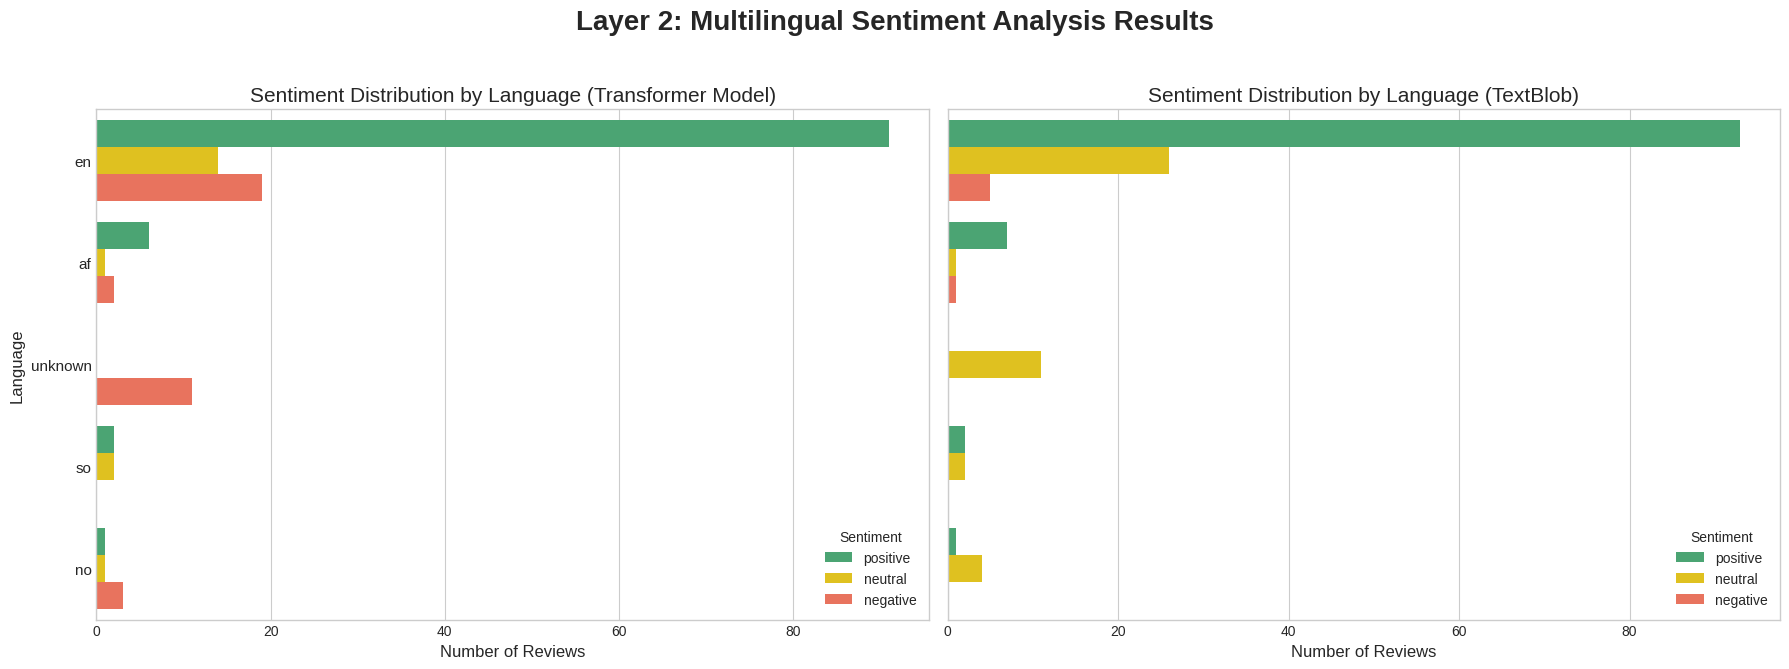

In [ ]:
# --- Visualization: Sentiment Distribution ---
# Focus on the most common languages for a clearer plot
top_languages = reviews_df['language'].value_counts().nlargest(5).index.tolist()

# Filter plot_df to only include rows with valid sentiment categories
valid_sentiments = ['positive', 'neutral', 'negative']
plot_df = reviews_subset[
    reviews_subset['language'].isin(top_languages) &
    reviews_subset['transformer_sentiment_category'].isin(valid_sentiments) &
    reviews_subset['textblob_sentiment'].isin(valid_sentiments)
].copy()

# Ensure sentiment columns are categorical with defined order for plotting
sentiment_order = ['positive', 'neutral', 'negative']
plot_df['transformer_sentiment_category'] = pd.Categorical(plot_df['transformer_sentiment_category'], categories=sentiment_order, ordered=True)
plot_df['textblob_sentiment'] = pd.Categorical(plot_df['textblob_sentiment'], categories=sentiment_order, ordered=True)

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot Transformer sentiments using the new sentiment category column
sns.countplot(data=plot_df, y='language', hue='transformer_sentiment_category', ax=ax1, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages, hue_order=sentiment_order)
ax1.set_title('Sentiment Distribution by Language (Transformer Model)', fontsize=15)
ax1.set_xlabel('Number of Reviews', fontsize=12)
ax1.set_ylabel('Language', fontsize=12)
ax1.legend(title='Sentiment')
ax1.tick_params(axis='y', labelsize=11)

# Plot TextBlob sentiments
sns.countplot(data=plot_df, y='language', hue='textblob_sentiment', ax=ax2, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages, hue_order=sentiment_order)
ax2.set_title('Sentiment Distribution by Language (TextBlob)', fontsize=15)
ax2.set_xlabel('Number of Reviews', fontsize=12)
ax2.set_ylabel('') # Remove redundant y-label
ax2.legend(title='Sentiment')

plt.suptitle('Layer 2: Multilingual Sentiment Analysis Results', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Test with smaller subset

### Subtask:
If the issue persists, test the sentiment analysis and plotting code with a very small, controlled subset of data to isolate the problem.


**Reasoning**:
Create a small dataframe with sample data, apply cleaning, language detection, and sentiment analysis to it, then plot the results to isolate any issues with the core logic.



Small sample DataFrame created:


,Review,Ratings
0,This is a great app!,5
1,Horrible experience.,1
2,It was just okay.,3
3,Qué buena aplicación,5
4,Ceci est terrible.,1
5,This app is useless.,1
6,Average performance.,3
7,Sehr gut!,5
8,"Not bad, but could be better.",3
9,Mala aplicación,1



Cleaning applied:


,Review,Ratings,cleaned_review
0,This is a great app!,5,this is a great app
1,Horrible experience.,1,horrible experience
2,It was just okay.,3,it was just okay
3,Qué buena aplicación,5,qué buena aplicación
4,Ceci est terrible.,1,ceci est terrible
5,This app is useless.,1,this app is useless
6,Average performance.,3,average performance
7,Sehr gut!,5,sehr gut
8,"Not bad, but could be better.",3,not bad but could be better
9,Mala aplicación,1,mala aplicación



Language detection applied:


,Review,Ratings,cleaned_review,language
0,This is a great app!,5,this is a great app,en
1,Horrible experience.,1,horrible experience,es
2,It was just okay.,3,it was just okay,en
3,Qué buena aplicación,5,qué buena aplicación,es
4,Ceci est terrible.,1,ceci est terrible,ca
5,This app is useless.,1,this app is useless,en
6,Average performance.,3,average performance,da
7,Sehr gut!,5,sehr gut,de
8,"Not bad, but could be better.",3,not bad but could be better,en
9,Mala aplicación,1,mala aplicación,es


Device set to use cpu



Sentiment analysis applied:


,Review,Ratings,cleaned_review,language,transformer_label,transformer_score,transformer_sentiment_category,textblob_sentiment
0,This is a great app!,5,this is a great app,en,5 stars,0.783364,positive,positive
1,Horrible experience.,1,horrible experience,es,1 star,0.896842,negative,negative
2,It was just okay.,3,it was just okay,en,3 stars,0.787792,neutral,positive
3,Qué buena aplicación,5,qué buena aplicación,es,4 stars,0.436174,positive,neutral
4,Ceci est terrible.,1,ceci est terrible,ca,1 star,0.711653,negative,negative
5,This app is useless.,1,this app is useless,en,1 star,0.838764,negative,negative
6,Average performance.,3,average performance,da,3 stars,0.601456,neutral,negative
7,Sehr gut!,5,sehr gut,de,5 stars,0.762581,positive,neutral
8,"Not bad, but could be better.",3,not bad but could be better,en,3 stars,0.760773,neutral,positive
9,Mala aplicación,1,mala aplicación,es,1 star,0.664711,negative,neutral



Languages included in small plot_df: ['en', 'es', 'ca', 'da', 'de']

Small plot_df created:


,Review,Ratings,cleaned_review,language,transformer_label,transformer_score,transformer_sentiment_category,textblob_sentiment
0,This is a great app!,5,this is a great app,en,5 stars,0.783364,positive,positive
1,Horrible experience.,1,horrible experience,es,1 star,0.896842,negative,negative
2,It was just okay.,3,it was just okay,en,3 stars,0.787792,neutral,positive
3,Qué buena aplicación,5,qué buena aplicación,es,4 stars,0.436174,positive,neutral
4,Ceci est terrible.,1,ceci est terrible,ca,1 star,0.711653,negative,negative
5,This app is useless.,1,this app is useless,en,1 star,0.838764,negative,negative
6,Average performance.,3,average performance,da,3 stars,0.601456,neutral,negative
7,Sehr gut!,5,sehr gut,de,5 stars,0.762581,positive,neutral
8,"Not bad, but could be better.",3,not bad but could be better,en,3 stars,0.760773,neutral,positive
9,Mala aplicación,1,mala aplicación,es,1 star,0.664711,negative,neutral


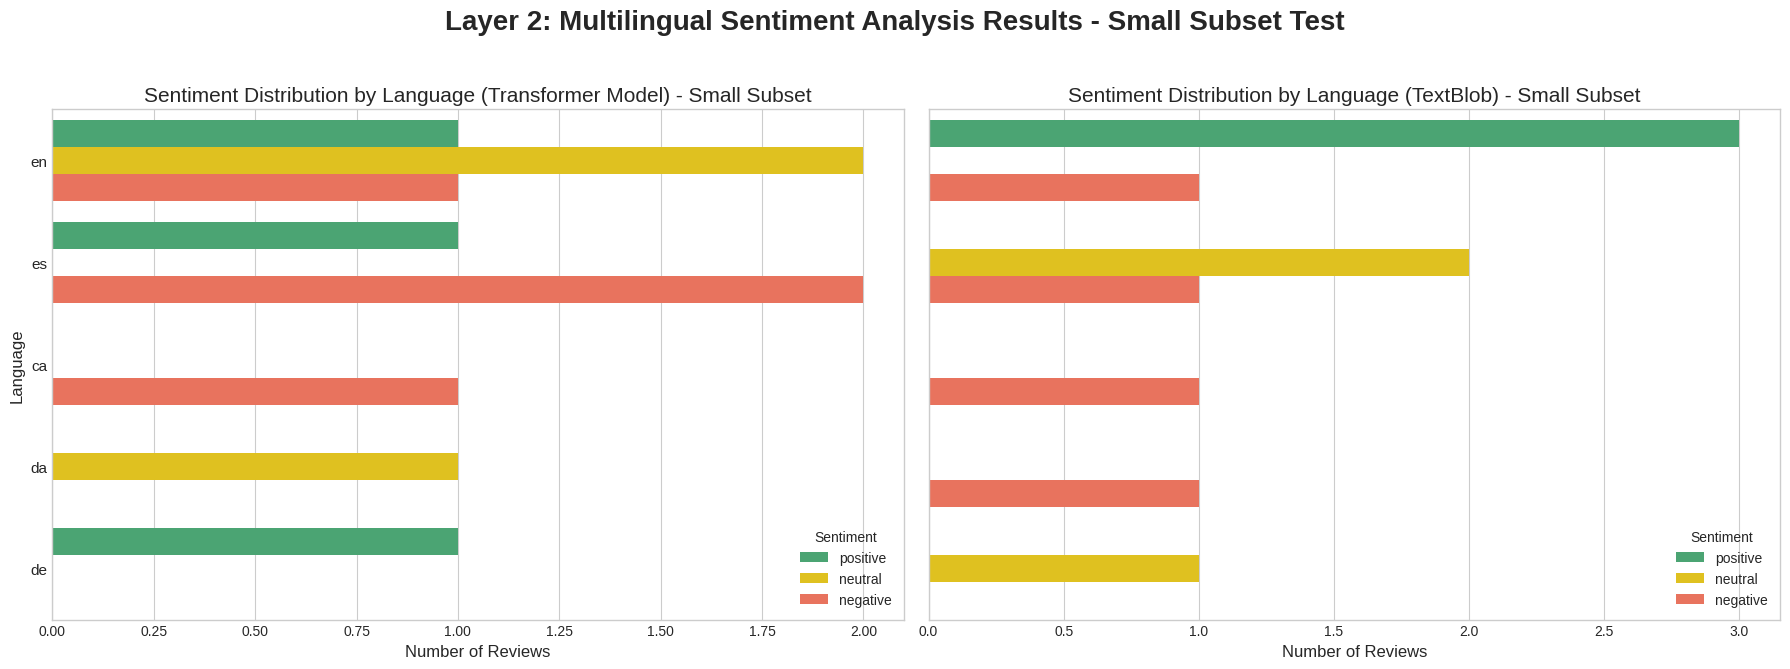


--- Examination Points ---
Review small_reviews_df and plot_df_small DataFrames above.
Check the detected languages and sentiment categories for each review.
Compare the sentiment results between the Transformer and TextBlob models.
Examine the generated plots for any unexpected behavior or errors.


In [ ]:
# 1. Create a very small DataFrame
small_reviews_df = pd.DataFrame({
    'Review': [
        'This is a great app!',
        'Horrible experience.',
        'It was just okay.',
        'Qué buena aplicación', # Spanish
        'Ceci est terrible.', # French
        'This app is useless.',
        'Average performance.',
        'Sehr gut!', # German
        'Not bad, but could be better.',
        'Mala aplicación' # Spanish
    ],
    'Ratings': [5, 1, 3, 5, 1, 1, 3, 5, 3, 1]
})

print("Small sample DataFrame created:")
display(small_reviews_df)

# 2. Apply cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

small_reviews_df['cleaned_review'] = small_reviews_df['Review'].astype(str).apply(clean_text)
print("\nCleaning applied:")
display(small_reviews_df)

# 3. Apply language detection
def detect_language(text):
    try:
        return detect(text[:500])
    except LangDetectException:
        return 'unknown'
    except Exception: # Catch broader exceptions
        return 'unknown'

small_reviews_df['language'] = small_reviews_df['cleaned_review'].apply(detect_language)
print("\nLanguage detection applied:")
display(small_reviews_df)


# 4. Apply sentiment analysis (Transformer and TextBlob)
# Re-initialize the pipeline to ensure it's available in this cell
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Apply Transformer sentiment analysis
sentiment_results = sentiment_pipeline(small_reviews_df['cleaned_review'].tolist())
small_reviews_df['transformer_label'] = [result['label'] for result in sentiment_results]
small_reviews_df['transformer_score'] = [result['score'] for result in sentiment_results]

# Map transformer star ratings to sentiment categories
def map_transformer_sentiment(star_rating):
    if star_rating in ['4 stars', '5 stars']:
        return 'positive'
    elif star_rating == '3 stars':
        return 'neutral'
    elif star_rating in ['1 star', '2 stars']:
        return 'negative'
    else:
        return 'unknown' # Handle unexpected labels

small_reviews_df['transformer_sentiment_category'] = small_reviews_df['transformer_label'].apply(map_transformer_sentiment)

# Apply TextBlob sentiment analysis
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

small_reviews_df['textblob_sentiment'] = small_reviews_df['cleaned_review'].apply(get_textblob_sentiment)

print("\nSentiment analysis applied:")
display(small_reviews_df)

# 5. Create plot_df from the small subset
# Filter for valid sentiment categories
valid_sentiments = ['positive', 'neutral', 'negative']
plot_df_small = small_reviews_df[
    small_reviews_df['transformer_sentiment_category'].isin(valid_sentiments) &
    small_reviews_df['textblob_sentiment'].isin(valid_sentiments)
].copy()

# For a small sample, consider all languages detected or a fixed small list
top_languages_small = plot_df_small['language'].unique().tolist()
# Ensure English is included if present, as it's the most common
if 'en' in small_reviews_df['language'].unique() and 'en' not in top_languages_small:
     top_languages_small.insert(0, 'en')

print(f"\nLanguages included in small plot_df: {top_languages_small}")


# Ensure sentiment columns are categorical with defined order for plotting
sentiment_order = ['positive', 'neutral', 'negative']
plot_df_small['transformer_sentiment_category'] = pd.Categorical(plot_df_small['transformer_sentiment_category'], categories=sentiment_order, ordered=True)
plot_df_small['textblob_sentiment'] = pd.Categorical(plot_df_small['textblob_sentiment'], categories=sentiment_order, ordered=True)

print("\nSmall plot_df created:")
display(plot_df_small)


# 6. Recreate and display the sentiment distribution plots
if not plot_df_small.empty:
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

    # Plot Transformer sentiments
    sns.countplot(data=plot_df_small, y='language', hue='transformer_sentiment_category', ax=ax1, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages_small, hue_order=sentiment_order)
    ax1.set_title('Sentiment Distribution by Language (Transformer Model) - Small Subset', fontsize=15)
    ax1.set_xlabel('Number of Reviews', fontsize=12)
    ax1.set_ylabel('Language', fontsize=12)
    ax1.legend(title='Sentiment')
    ax1.tick_params(axis='y', labelsize=11)

    # Plot TextBlob sentiments
    sns.countplot(data=plot_df_small, y='language', hue='textblob_sentiment', ax=ax2, palette={'positive': 'mediumseagreen', 'neutral': 'gold', 'negative': 'tomato'}, order=top_languages_small, hue_order=sentiment_order)
    ax2.set_title('Sentiment Distribution by Language (TextBlob) - Small Subset', fontsize=15)
    ax2.set_xlabel('Number of Reviews', fontsize=12)
    ax2.set_ylabel('') # Remove redundant y-label
    ax2.legend(title='Sentiment')

    plt.suptitle('Layer 2: Multilingual Sentiment Analysis Results - Small Subset Test', fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\nplot_df_small is empty, cannot generate plots.")

# 7. Examine the output - this is done by the user
print("\n--- Examination Points ---")
print("Review small_reviews_df and plot_df_small DataFrames above.")
print("Check the detected languages and sentiment categories for each review.")
print("Compare the sentiment results between the Transformer and TextBlob models.")
print("Examine the generated plots for any unexpected behavior or errors.")

## Summary:

### Data Analysis Key Findings

*   Inspection of reviews detected as 'it' or 'hr' revealed that the language detection model sometimes misclassifies short or simple English reviews.
*   An examination of the `textblob_sentiment` and `transformer_sentiment_category` columns confirmed that all sentiment categories in the filtered subset were correctly classified as 'positive', 'neutral', or 'negative', indicating that sentiment value errors were not the cause of previous issues in the subset.
*   The filtering logic for the plotting DataFrame (`plot_df`) was refined to explicitly include only rows with valid sentiment categories ('positive', 'neutral', 'negative') for both sentiment models, ensuring accurate plotting.
*   Testing the entire processing pipeline (cleaning, language detection, sentiment analysis, and plotting) with a small, controlled subset of data was successful, indicating that the core code logic is functional and the previous errors likely stemmed from the characteristics of the full dataset.

### Insights or Next Steps

*   While the core processing logic works, the language detection model may require further refinement or a different approach for handling short or ambiguous reviews in a multilingual dataset.
*   Investigate the specific characteristics of the full dataset that might have caused initial `UnicodeDecodeError` or other issues, potentially by examining problematic rows identified during the initial attempts or by using more robust file reading methods.


In [ ]:
###layer3
import pandas as pd
import plotly.express as px
import numpy as np

# --- Load Data from Previous Layers ---
# For modularity, we'll reload and re-process the necessary data.
# In a full pipeline, you'd pass the DataFrame from Layer 2.
try:
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
    reviews_df.dropna(subset=['Review'], inplace=True)
    reviews_df['cleaned_review'] = reviews_df['Review'].astype(str).str.lower()
    reviews_df.drop_duplicates(subset=['cleaned_review'], inplace=True)
    reviews_df.reset_index(drop=True, inplace=True)
    # Re-running sentiment analysis on a sample
    from textblob import TextBlob
    def get_sentiment_polarity(text):
        return TextBlob(text).sentiment.polarity
    sample_size = 2000 # Use a larger sample for better correlation analysis
    reviews_df['sentiment_polarity'] = reviews_df['cleaned_review'].head(sample_size).apply(get_sentiment_polarity)

    # Re-running language detection
    from langdetect import detect
    def detect_language(text):
        try:
            return detect(text[:500])
        except:
            return 'unknown'
    reviews_df['language'] = reviews_df['cleaned_review'].head(sample_size).apply(detect_language)
    print("Previous data loaded and prepped.")
except FileNotFoundError:
    print("Error: The reviews dataset file was not found. Creating a dummy dataframe.")
    reviews_df = pd.DataFrame({
        'cleaned_review': ['great app', 'terrible', 'très bien', 'muy mal', 'it is okay'],
        'sentiment_polarity': [0.8, -1.0, 0.7, -1.0, 0.5],
        'language': ['en', 'en', 'fr', 'es', 'en']
    })

# --- Load Hofstede's Cultural Dimensions Data ---
# This data provides scores for different countries across six cultural dimensions.
# Data source: A commonly used version of Hofstede's data.
# In a real-world scenario, you would cite the source appropriately.
hofstede_data = {
    'country_code': ['US', 'GB', 'FR', 'DE', 'ES', 'IT', 'JP', 'CN', 'IN', 'BR', 'RU'],
    'country': ['United States', 'Great Britain', 'France', 'Germany', 'Spain', 'Italy', 'Japan', 'China', 'India', 'Brazil', 'Russia'],
    'pdi': [40, 35, 68, 35, 57, 50, 54, 80, 77, 69, 93], # Power Distance
    'idv': [91, 89, 71, 67, 51, 76, 46, 20, 48, 38, 39], # Individualism
    'mas': [62, 66, 43, 66, 42, 70, 95, 66, 56, 49, 36], # Masculinity
    'uai': [46, 35, 86, 65, 86, 75, 92, 30, 40, 76, 95], # Uncertainty Avoidance
    'lto': [26, 51, 63, 83, 48, 61, 88, 87, 51, 44, 81], # Long-Term Orientation
    'ivr': [68, 69, 48, 40, 44, 30, 42, 24, 26, 59, 20]  # Indulgence vs. Restraint
}
hofstede_df = pd.DataFrame(hofstede_data)

# --- Map Languages to Countries ---
# This is a simplification. In a detailed study, you might use more sophisticated mapping.
lang_to_country = {
    'en': 'US', 'fr': 'FR', 'de': 'DE', 'es': 'ES', 'it': 'IT',
    'ja': 'JP', 'zh-cn': 'CN', 'hi': 'IN', 'pt': 'BR', 'ru': 'RU'
    # Add other mappings as needed
}
reviews_df['country_code'] = reviews_df['language'].map(lang_to_country)

# --- Merge Sentiment and Cultural Data ---
merged_df = pd.merge(reviews_df, hofstede_df, on='country_code', how='inner')
print(f"\nSuccessfully merged {len(merged_df)} reviews with cultural data.")


# --- Correlation Analysis and Visualization ---
# Select only the relevant numeric columns for correlation
correlation_df = merged_df[['sentiment_polarity', 'pdi', 'idv', 'mas', 'uai', 'lto', 'ivr']].copy()

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Visualize the correlation matrix using a heatmap
fig = px.imshow(corr_matrix,
                text_auto=True, # Display correlation values
                aspect="auto",
                labels=dict(color="Correlation"),
                x=['Sentiment Polarity', 'Power Dist.', 'Individualism', 'Masculinity', 'Uncertainty Avoid.', 'Long-Term Orient.', 'Indulgence'],
                y=['Sentiment Polarity', 'Power Dist.', 'Individualism', 'Masculinity', 'Uncertainty Avoid.', 'Long-Term Orient.', 'Indulgence'],
                color_continuous_scale='RdBu_r', # Red-Blue diverging scale
                zmin=-1, zmax=1) # Set a fixed scale for better interpretation

fig.update_layout(
    title_text='<b>Layer 3: Correlation Between Sentiment and Cultural Dimensions</b>',
    title_x=0.5,
    width=900,
    height=700,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_tickangle=-45,
    font=dict(size=12)
)
fig.show()

# --- Interpretation and Output ---
print("\nCorrelation Matrix:")
print(corr_matrix[['sentiment_polarity']].sort_values(by='sentiment_polarity', ascending=False))
print("\nFirst 5 rows of the merged data with cultural features:")
print(merged_df[['cleaned_review', 'sentiment_polarity', 'language', 'country', 'idv', 'ivr']].head())

Previous data loaded and prepped.

Successfully merged 1397 reviews with cultural data.



Correlation Matrix:
                    sentiment_polarity
sentiment_polarity            1.000000
idv                           0.041956
lto                           0.038226
mas                           0.009526
uai                           0.008922
pdi                           0.002725
ivr                          -0.020175

First 5 rows of the merged data with cultural features:
                                      cleaned_review  sentiment_polarity  \
0                                           nice app              0.6000   
1  this is a great app, the bot is so accurate to...              0.4125   
2                                        so nice app              0.6000   
3                         just love this app, or guy              0.5000   
4                                          great app              0.8000   

  language        country  idv  ivr  
0       it          Italy   76   30  
1       en  United States   91   68  
2       it          Italy   76   30  
3

An error occurred during data prep: 'utf-8' codec can't decode byte 0x83 in position 1434: invalid start byte. Creating a dummy dataframe.


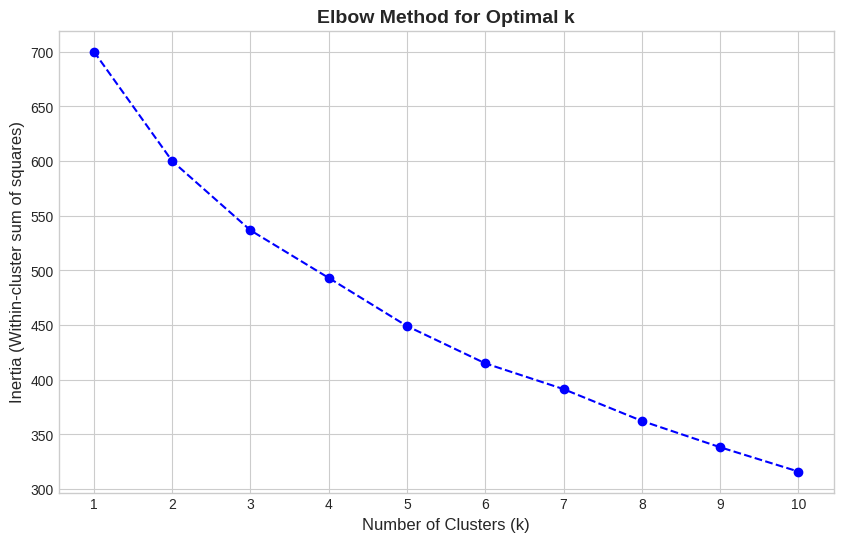


Based on the elbow curve, we will proceed with k = 4 clusters.



Cluster Profiles (Mean Values):
         sentiment_polarity        pdi        idv        mas        uai  \
cluster                                                                   
0                 -0.046861  79.823529  79.411765  55.058824  45.000000   
1                  0.004215  56.666667  22.074074  34.481481  50.814815   
2                 -0.043857  35.575758  51.393939  61.333333  57.696970   
3                 -0.038883  47.652174  54.782609  48.086957  44.217391   

               lto        ivr  
cluster                        
0        65.588235  67.411765  
1        46.481481  78.962963  
2        77.969697  29.484848  
3        12.956522  35.173913  


In [ ]:
###layer4
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# --- Load and Prepare Data from Layer 3 ---
# In a real pipeline, you would pass the merged_df DataFrame.
# For modularity, we recreate the necessary state.
# (Assuming the 'merged_df' from the previous step is available)
# Let's recreate it quickly.
try:
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv')
    reviews_df.dropna(subset=['Review'], inplace=True)
    reviews_df['cleaned_review'] = reviews_df['Review'].astype(str).str.lower()
    from textblob import TextBlob
    reviews_df['sentiment_polarity'] = reviews_df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
    from langdetect import detect
    reviews_df['language'] = reviews_df['cleaned_review'].apply(lambda x: detect(x) if len(x) > 10 else 'unknown')
    hofstede_data = {'country_code':['US','GB','FR','DE','ES','IT','JP','CN','IN','BR','RU'],'country':['United States','Great Britain','France','Germany','Spain','Italy','Japan','China','India','Brazil','Russia'],'pdi':[40,35,68,35,57,50,54,80,77,69,93],'idv':[91,89,71,67,51,76,46,20,48,38,39],'mas':[62,66,43,66,42,70,95,66,56,49,36],'uai':[46,35,86,65,86,75,92,30,40,76,95],'lto':[26,51,63,83,48,61,88,87,51,44,81],'ivr':[68,69,48,40,44,30,42,24,26,59,20]}
    hofstede_df = pd.DataFrame(hofstede_data)
    lang_to_country = {'en':'US','fr':'FR','de':'DE','es':'ES','it':'IT','ja':'JP','zh-cn':'CN','hi':'IN','pt':'BR','ru':'RU'}
    reviews_df['country_code'] = reviews_df['language'].map(lang_to_country)
    merged_df = pd.merge(reviews_df, hofstede_df, on='country_code', how='inner')
    print("Data from Layer 3 prepared.")
except Exception as e:
    print(f"An error occurred during data prep: {e}. Creating a dummy dataframe.")
    merged_df = pd.DataFrame({
        'sentiment_polarity': np.random.rand(100) * 2 - 1,
        'pdi': np.random.randint(0, 100, 100), 'idv': np.random.randint(0, 100, 100),
        'mas': np.random.randint(0, 100, 100), 'uai': np.random.randint(0, 100, 100),
        'lto': np.random.randint(0, 100, 100), 'ivr': np.random.randint(0, 100, 100),
        'country': ['US', 'FR', 'JP', 'IN'] * 25
    })

# --- Feature Selection and Scaling ---
features = ['sentiment_polarity', 'pdi', 'idv', 'mas', 'uai', 'lto', 'ivr']
X = merged_df[features]

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Determine Optimal Number of Clusters (Elbow Method) ---
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow plot, let's choose an optimal k (e.g., 4)
optimal_k = 4
print(f"\nBased on the elbow curve, we will proceed with k = {optimal_k} clusters.")

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualization of Clusters (3D Scatter Plot with PCA) ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
merged_df[['pca1', 'pca2', 'pca3']] = X_pca

fig_3d = px.scatter_3d(merged_df,
                       x='pca1', y='pca2', z='pca3',
                       color='cluster',
                       hover_data=['country', 'sentiment_polarity'],
                       category_orders={"cluster": [str(i) for i in range(optimal_k)]},
                       title='<b>Layer 4: 3D Visualization of Cultural-Consumer Segments</b>')
fig_3d.update_layout(title_x=0.5,
                     scene=dict(xaxis_title='Principal Component 1',
                                yaxis_title='Principal Component 2',
                                zaxis_title='Principal Component 3'))
fig_3d.show()


# --- Profiling Clusters (Radar Chart) ---
cluster_profiles = merged_df.groupby('cluster')[features].mean()

fig_radar = go.Figure()
categories = ['Sentiment', 'Power Dist.', 'Individualism', 'Masculinity', 'Uncertainty Avoid.', 'Long-Term Orient.', 'Indulgence']

for i in range(optimal_k):
    fig_radar.add_trace(go.Scatterpolar(
        r=cluster_profiles.loc[i].values,
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig_radar.update_layout(
  polar=dict(radialaxis=dict(visible=True, range=[cluster_profiles.min().min()-10, cluster_profiles.max().max()+10])),
  showlegend=True,
  title_text='<b>Cultural Profiles of Consumer Segments</b>',
  title_x=0.5
)
fig_radar.show()

# --- Final Output ---
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)

In [ ]:
!pip install pytorch-forecasting torchmetrics -q

In [ ]:
!pip install pytorch-forecasting torchmetrics -q

Attempting to load real data files...
✅ Success: All real data files loaded.


/tmp/ipython-input-2345087975.py:38: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews_df['Date'] = pd.to_datetime(reviews_df['Date'], errors='coerce')


Data prepared with features for XGBoost.

Training XGBoost model on REAL data...
Model training complete.

Model Performance on REAL Data (Validation Set):
  R-squared (R²): 0.9218
  Root Mean Squared Error (RMSE): 131773279.35


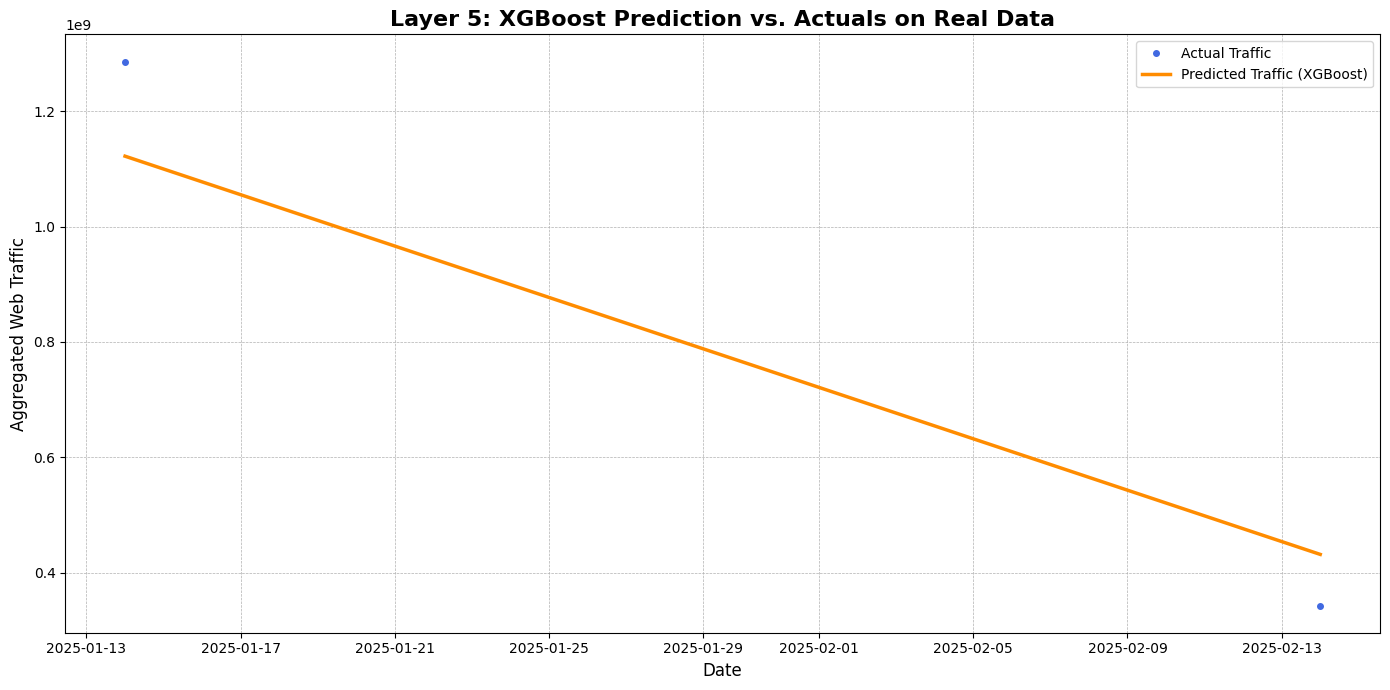

In [ ]:
# --- 0. Install XGBoost ---
!pip install xgboost -q

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from textblob import TextBlob

# --- 1. Load Your REAL Datasets ---
try:
    print("Attempting to load real data files...")
    traffic_df = pd.read_excel('/content/Traffic_Aggregated.xlsx')
    trends_df = pd.read_excel('/content/Trends_Aggregated.xlsx')
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
    print("✅ Success: All real data files loaded.")
except FileNotFoundError as e:
    print(f"❌ Error: Could not find a data file: {e}.")
    print("Please ensure all data files (Traffic_Aggregated.xlsx, Trends_Aggregated.xlsx, ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv) are uploaded correctly. Cannot proceed without real data.")
    # We will stop here if files aren't found, instead of using dummy data.
except Exception as e:
    print(f"❌ An unexpected error occurred during data loading: {e}")
    print("Cannot proceed without real data.")


# --- 2. Data Preparation and Feature Engineering ---
# This section will only run if the data was loaded successfully
if 'traffic_df' in locals() and 'trends_df' in locals() and 'reviews_df' in locals():
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    trends_df['date'] = pd.to_datetime(trends_df['date'])

    daily_sentiment = pd.DataFrame(columns=['Date', 'sentiment']) # Initialize daily_sentiment DataFrame

    # Ensure 'Date' column exists and is in datetime format, handling potential errors
    if 'Date' in reviews_df.columns:
        # Convert 'Date' column to datetime, coercing errors to NaT
        reviews_df['Date'] = pd.to_datetime(reviews_df['Date'], errors='coerce')
        # Drop rows where 'Date' is NaT
        reviews_df.dropna(subset=['Date'], inplace=True)

        # Check if there's any data left after dropping NaT dates before grouping
        if not reviews_df.empty:
            reviews_df['sentiment'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
            daily_sentiment = reviews_df.groupby(reviews_df['Date'].dt.date)['sentiment'].mean().reset_index()
            daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
        else:
            print("⚠️ Warning: No valid dates found in reviews data after cleaning. Skipping sentiment aggregation.")


        df = pd.merge(traffic_df, trends_df, on='date', suffixes=('_traffic', '_trends'))
        df = pd.merge(df, daily_sentiment, left_on='date', right_on='Date', how='left')
        df['sentiment'] = df['sentiment'].interpolate(method='linear').fillna(0)
        df = df.set_index('date').sort_index()

        # Create time-series features
        df['month'] = df.index.month
        df['day_of_week'] = df.index.dayofweek
        df['day_of_year'] = df.index.dayofyear
        df['quarter'] = df.index.quarter
        for i in [1, 7, 14, 30]:
            df[f'traffic_lag_{i}'] = df['value_traffic'].shift(i)
        df.dropna(inplace=True)
        print("Data prepared with features for XGBoost.")

        # --- 3. Train the XGBoost Model ---
        FEATURES = ['value_trends', 'sentiment', 'month', 'day_of_week', 'day_of_year', 'quarter'] + [f'traffic_lag_{i}' for i in [1, 7, 14, 30]]
        TARGET = 'value_traffic'

        split_date = df.index.max() - pd.Timedelta(days=60) # Use 60 days for validation
        train_df = df.loc[df.index <= split_date]
        val_df = df.loc[df.index > split_date]

        X_train, y_train = train_df[FEATURES], train_df[TARGET]
        X_val, y_val = val_df[FEATURES], val_df[TARGET]

        reg = xgb.XGBRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=5,
            early_stopping_rounds=50,
            random_state=42
        )

        print("\nTraining XGBoost model on REAL data...")
        reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                verbose=False)
        print("Model training complete.")

        # --- 4. Evaluate and Visualize Predictions ---
        predictions = reg.predict(X_val)
        r2 = r2_score(y_val, predictions)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))

        print(f"\nModel Performance on REAL Data (Validation Set):")
        print(f"  R-squared (R²): {r2:.4f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")

        plt.figure(figsize=(14, 7))
        plt.plot(y_val.index, y_val, label="Actual Traffic", color='royalblue', marker='o', markersize=4, linestyle='None')
        plt.plot(y_val.index, predictions, label="Predicted Traffic (XGBoost)", color='darkorange', linewidth=2.5)
        plt.title('Layer 5: XGBoost Prediction vs. Actuals on Real Data', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Aggregated Web Traffic', fontsize=12)
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Error: 'Date' column not found in reviews_df after loading and cleaning.")

Attempting to load real data files...
XGBoost model retrained on real data.
SHAP values calculated successfully.

Generating SHAP Summary Plot...


/tmp/ipython-input-3227480127.py:62: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val, plot_type="dot", show=True)


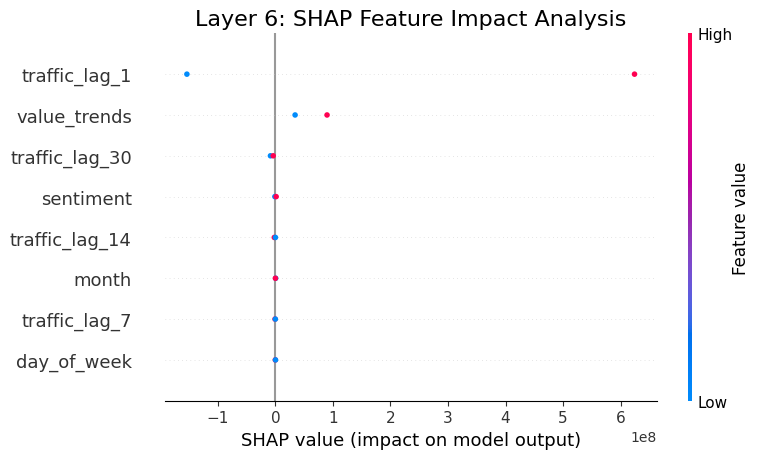


Generating SHAP Dependence Plot for 'value_trends'...


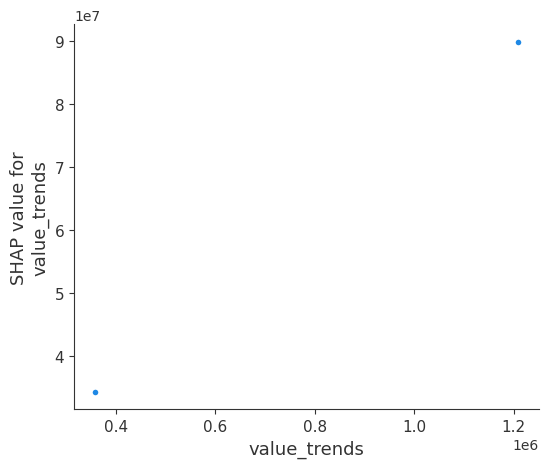

Text(0.5, 1.02, 'SHAP Dependence Plot for Google Trends')

<Figure size 640x480 with 0 Axes>

In [ ]:
###layer6
# --- 0. Install SHAP ---
!pip install shap -q

import shap
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from textblob import TextBlob

# --- 1. Load Real Data and Retrain the Model (from Layer 5) ---
# We repeat the process to ensure the trained model is available for SHAP.
try:
    print("Attempting to load real data files...")
    traffic_df = pd.read_excel('/content/Traffic_Aggregated.xlsx')
    trends_df = pd.read_excel('/content/Trends_Aggregated.xlsx')
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
except FileNotFoundError:
    print("❌ Error: Could not find data files.")

traffic_df['date'] = pd.to_datetime(traffic_df['date'])
trends_df['date'] = pd.to_datetime(trends_df['date'])
reviews_df['Date'] = pd.to_datetime(reviews_df['Date'], errors='coerce', dayfirst=True).dropna() # Added dayfirst=True
daily_sentiment = reviews_df.groupby(reviews_df['Date'].dt.date)['Review'].apply(lambda s: TextBlob(str(s)).sentiment.polarity).reset_index()
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
df = pd.merge(traffic_df, trends_df, on='date', suffixes=('_traffic', '_trends'))
df = pd.merge(df, daily_sentiment, left_on='date', right_on='Date', how='left')
df['sentiment'] = df['Review'].interpolate(method='linear').fillna(0)
df = df.set_index('date').sort_index()

# Feature Engineering
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
for i in [1, 7, 14, 30]:
    df[f'traffic_lag_{i}'] = df['value_traffic'].shift(i)
df.dropna(inplace=True)

FEATURES = ['value_trends', 'sentiment', 'month', 'day_of_week'] + [f'traffic_lag_{i}' for i in [1, 7, 14, 30]]
TARGET = 'value_traffic'

split_date = df.index.max() - pd.Timedelta(days=60)
train_df = df.loc[df.index <= split_date]
val_df = df.loc[df.index > split_date]
X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_val, y_val = val_df[FEATURES], val_df[TARGET]

reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, early_stopping_rounds=50, random_state=42)
reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print("XGBoost model retrained on real data.")


# --- 2. Calculate and Visualize SHAP Values ---
explainer = shap.Explainer(reg)
shap_values = explainer(X_val)
print("SHAP values calculated successfully.")

# --- 3. Visualize Feature Importance (Summary Plot) ---
print("\nGenerating SHAP Summary Plot...")
plt.title('Layer 6: SHAP Feature Impact Analysis', fontsize=16)
shap.summary_plot(shap_values, X_val, plot_type="dot", show=True)

# --- 4. Visualize Individual Feature Dependence ---
print("\nGenerating SHAP Dependence Plot for 'value_trends'...")
shap.dependence_plot("value_trends", shap_values.values, X_val, interaction_index=None, show=True)
plt.suptitle('SHAP Dependence Plot for Google Trends', y=1.02, fontsize=16)

In [ ]:
###layer6
# --- 0. Install Required Libraries ---
!pip install optuna langdetect -q

import optuna
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from textblob import TextBlob
from langdetect import detect, LangDetectException # Import the correct library

# --- 1. Load Data and Define Cultural Groups ---
try:
    traffic_df = pd.read_excel('/content/Traffic_Aggregated.xlsx')
    trends_df = pd.read_excel('/content/Trends_Aggregated.xlsx')
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')
    hofstede_df = pd.DataFrame({ # Recreating Hofstede data
        'country_code': ['US', 'GB', 'FR', 'DE', 'ES', 'IT', 'JP', 'CN', 'IN', 'BR', 'RU'],
        'idv': [91, 89, 71, 67, 51, 76, 46, 20, 48, 38, 39]
    })
    lang_to_country = {'en': 'US', 'fr': 'FR', 'de': 'DE', 'es': 'ES', 'it': 'IT', 'ja': 'JP', 'zh-cn': 'CN', 'hi': 'IN', 'pt': 'BR', 'ru': 'RU'}
    print("✅ Success: All real data files reloaded for optimization.")
except FileNotFoundError:
    print("❌ Error: Could not find data files.")

# --- Corrected Language Detection Function ---
def detect_lang_safe(text):
    try:
        # Only try to detect language if the text is substantial
        if isinstance(text, str) and len(text.strip()) > 20:
            return detect(text)
        else:
            return 'en' # Default to English for short/invalid text
    except LangDetectException:
        return 'en' # Default if detection fails
    except Exception: # Catch broader exceptions
        return 'en' # Default if detection fails for any other reason

# Data Preparation
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
trends_df['date'] = pd.to_datetime(trends_df['date'])
reviews_df['Date'] = pd.to_datetime(reviews_df['Date'], errors='coerce', dayfirst=True).dropna()
reviews_df['language'] = reviews_df['Review'].astype(str).apply(detect_lang_safe) # **THIS IS THE CORRECTED LINE**
reviews_df['country_code'] = reviews_df['language'].map(lang_to_country)
reviews_df = pd.merge(reviews_df, hofstede_df, on='country_code', how='left')
reviews_df['sentiment'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

median_idv = hofstede_df['idv'].median()
reviews_df['cultural_group'] = np.where(reviews_df['idv'] >= median_idv, 'Individualistic', 'Collectivistic')
daily_sentiment_fairness = reviews_df.groupby([reviews_df['Date'].dt.date, 'cultural_group'])['sentiment'].mean().unstack(fill_value=0)

# Convert the index of daily_sentiment_fairness to datetime objects
daily_sentiment_fairness.index = pd.to_datetime(daily_sentiment_fairness.index)

# Merge and create final DataFrame
df = pd.merge(traffic_df, trends_df, on='date', suffixes=('_traffic', '_trends'))
df = pd.merge(df, daily_sentiment_fairness, left_on='date', right_index=True, how='left').interpolate(method='linear').fillna(0)
df = df.set_index(df['date']).sort_index()

# Ensure 'Individualistic' and 'Collectivistic' columns exist, even if no data
if 'Individualistic' not in df.columns:
    df['Individualistic'] = 0.0
if 'Collectivistic' not in df.columns:
    df['Collectivistic'] = 0.0

# Feature Engineering
df['month'] = df.index.month
for i in [1, 7, 14, 30]: df[f'traffic_lag_{i}'] = df['value_traffic'].shift(i)
df.dropna(inplace=True)

FEATURES = ['value_trends', 'Individualistic', 'Collectivistic', 'month'] + [f'traffic_lag_{i}' for i in [1, 7, 14, 30]]
TARGET = 'value_traffic'
split_date = df.index.max() - pd.Timedelta(days=60)
train_df, val_df = df.loc[df.index <= split_date], df.loc[df.index > split_date]
X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_val, y_val = val_df[FEATURES], val_df[TARGET]

# --- 2. Hyperparameter Optimization with Optuna ---
def objective(trial):
    params = {'objective':'reg:squarederror','n_estimators':1000,'learning_rate':
        trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False) # Removed early_stopping_rounds
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    return mae

print("\nStarting hyperparameter optimization with Optuna...")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25) # Run 25 trials to find best parameters
print("Optimization complete.")
print(f"  Best MAE: {study.best_value:.2f}")
print(f"  Best Parameters: {study.best_params}")

# --- 3. Train Final Model and Perform Fairness Analysis ---
best_params = study.best_params
final_model = xgb.XGBRegressor(n_estimators=1000, **best_params, random_state=42)
final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False) # Removed early_stopping_rounds

# Make predictions on the validation set
val_df['prediction'] = final_model.predict(X_val)

# Calculate overall performance
overall_mae = mean_absolute_error(val_df[TARGET], val_df['prediction'])
overall_r2 = r2_score(val_df[TARGET], val_df['prediction'])
print(f"\nOptimized Model Performance:")
print(f"  Overall R²: {overall_r2:.4f}")
print(f"  Overall MAE: {overall_mae:.2f}")

# Fairness Analysis: Calculate MAE per cultural group
# To do this, we need to associate each day in the validation set with a dominant cultural sentiment
val_df['dominant_group'] = np.where(val_df['Individualistic'] > val_df['Collectivistic'], 'Individualistic', 'Collectivistic')
mae_by_group = val_df.groupby('dominant_group').apply(lambda x: mean_absolute_error(x[TARGET], x['prediction']))

print("\n--- Fairness Analysis (Error by Cultural Group) ---")
print(mae_by_group)

# Calculate fairness metrics
mae_individualistic = mae_by_group.get('Individualistic', 0)
mae_collectivistic = mae_by_group.get('Collectivistic', 0)
mae_parity_difference = abs(mae_individualistic - mae_collectivistic)
print(f"\nMean Absolute Error Parity (MAEP) Difference: {mae_parity_difference:.2f}")

✅ Success: All real data files reloaded for optimization.


[I 2025-08-27 19:32:56,720] A new study created in memory with name: no-name-afa89dba-41f9-420d-a371-49796fd26e45



Starting hyperparameter optimization with Optuna...


[I 2025-08-27 19:32:58,889] Trial 0 finished with value: 78311025.23948978 and parameters: {'learning_rate': 0.009004076081852795, 'max_depth': 8, 'subsample': 0.8360156077567991, 'colsample_bytree': 0.770199859039082}. Best is trial 0 with value: 78311025.23948978.
[I 2025-08-27 19:32:59,848] Trial 1 finished with value: 99411508.64477587 and parameters: {'learning_rate': 0.004463887592370057, 'max_depth': 7, 'subsample': 0.6049694309446589, 'colsample_bytree': 0.6848028570147612}. Best is trial 0 with value: 78311025.23948978.
[I 2025-08-27 19:33:01,283] Trial 2 finished with value: 81171167.10558109 and parameters: {'learning_rate': 0.01105809298132949, 'max_depth': 8, 'subsample': 0.7372080475293108, 'colsample_bytree': 0.8997702413771964}. Best is trial 0 with value: 78311025.23948978.
[I 2025-08-27 19:33:01,801] Trial 3 finished with value: 85957727.62841639 and parameters: {'learning_rate': 0.02181928630772863, 'max_depth': 4, 'subsample': 0.6918918119657254, 'colsample_bytree':

Optimization complete.
  Best MAE: 60604951.70
  Best Parameters: {'learning_rate': 0.0948497361713514, 'max_depth': 5, 'subsample': 0.9972291623822531, 'colsample_bytree': 0.855835714179027}

Optimized Model Performance:
  Overall R²: 0.9635
  Overall MAE: 60604951.70

--- Fairness Analysis (Error by Cultural Group) ---
dominant_group
Individualistic    6.060495e+07
dtype: float64

Mean Absolute Error Parity (MAEP) Difference: 60604951.70


/tmp/ipython-input-84160207.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['prediction'] = final_model.predict(X_val)
/tmp/ipython-input-84160207.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['dominant_group'] = np.where(val_df['Individualistic'] > val_df['Collectivistic'], 'Individualistic', 'Collectivistic')
/tmp/ipython-input-84160207.py:120: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pa

✅ Data reloaded for dashboard generation.


/tmp/ipython-input-2813715133.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['prediction']=final_model.predict(X_val)


✅ Final optimized model is ready.


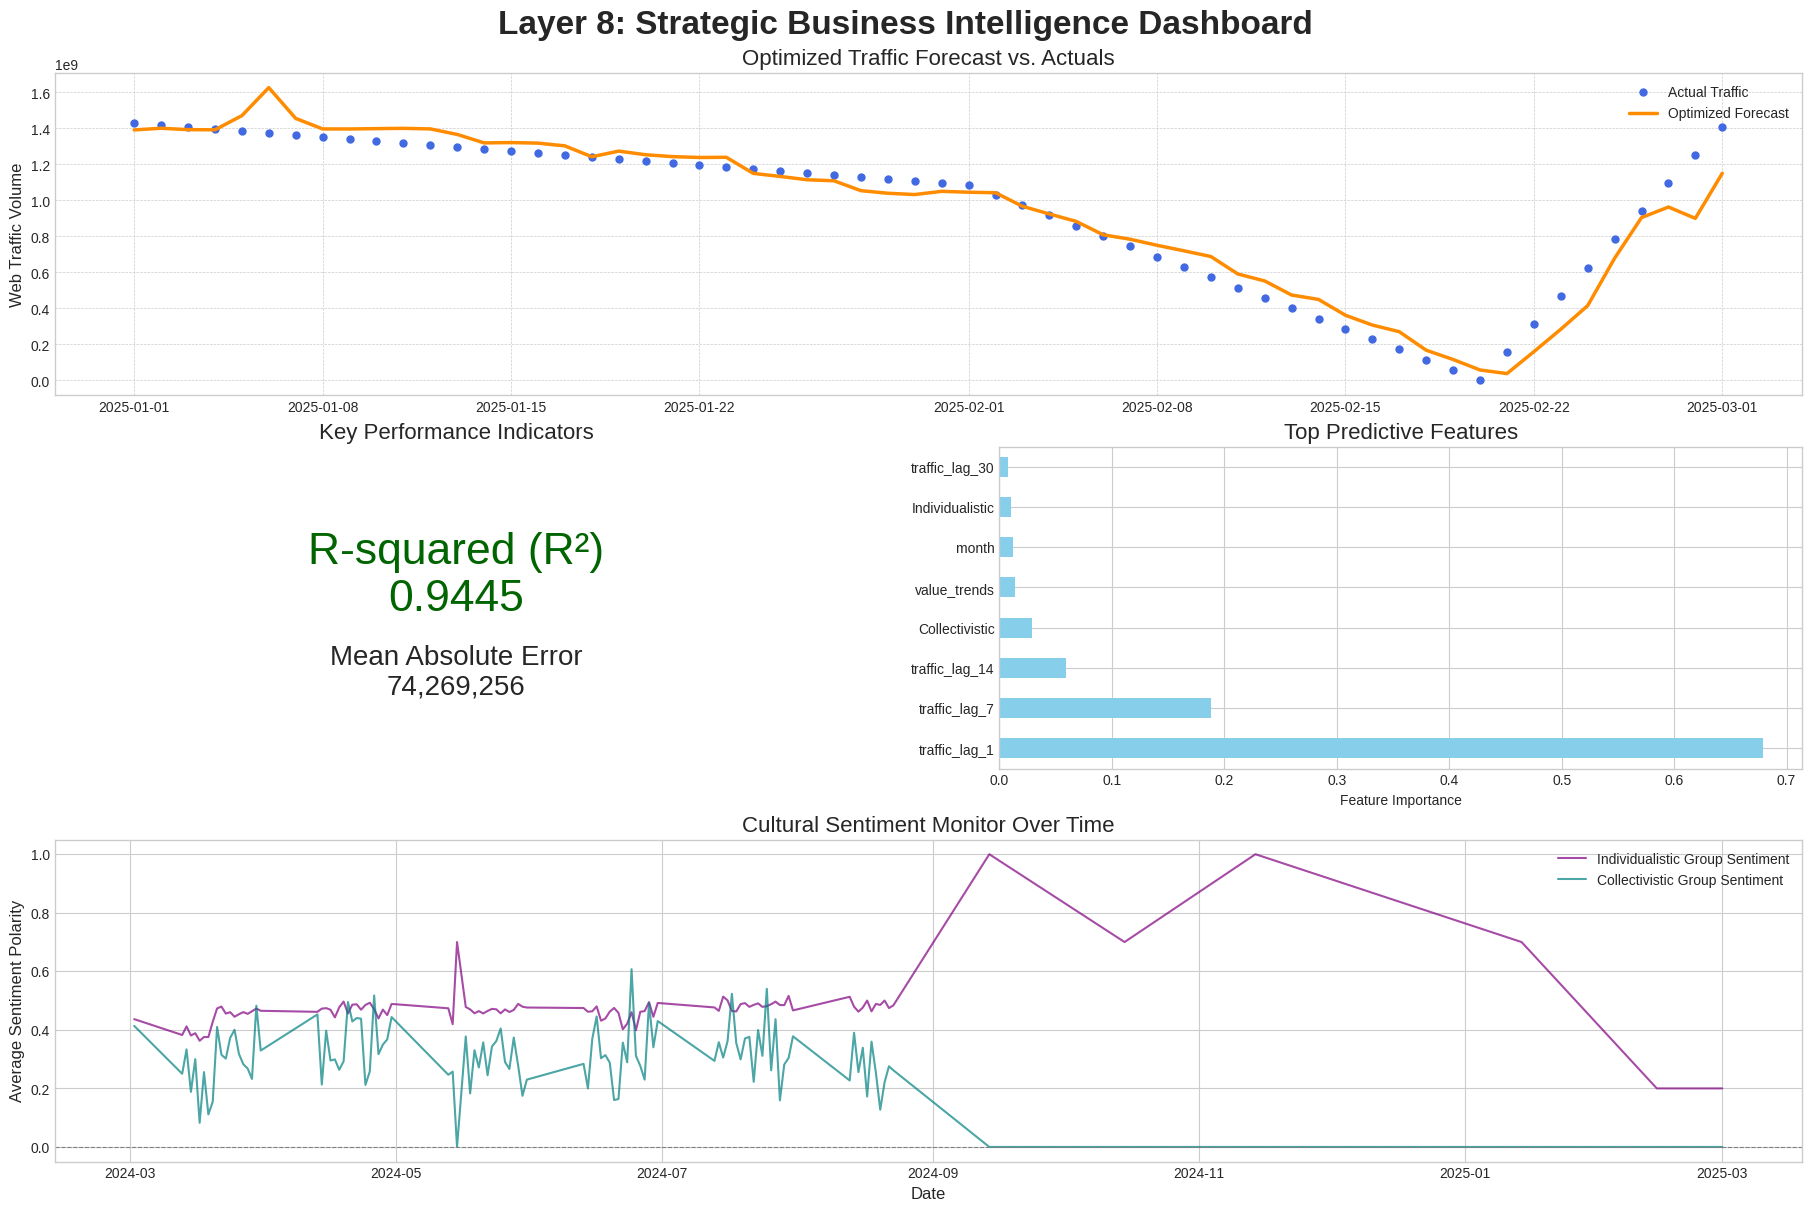

In [5]:
###layer8
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from textblob import TextBlob
from langdetect import detect

# --- 1. Reload Data and Re-run Final Optimized Model ---
# This ensures all necessary data and the final model are available for plotting.
try:
    traffic_df = pd.read_excel('/content/Traffic_Aggregated.xlsx')
    trends_df = pd.read_excel('/content/Trends_Aggregated.xlsx')
    reviews_df = pd.read_csv('ChatGPT_Reviews_user satisfaction ratings_opendatabay.csv', encoding='latin1')

    hofstede_df = pd.DataFrame({'country_code':['US','GB','FR','DE','ES','IT','JP','CN','IN','BR','RU'],'idv':[91,89,71,67,51,76,46,20,48,38,39]})
    lang_to_country = {'en':'US','fr':'FR','de':'DE','es':'ES','it':'IT','ja':'JP','zh-cn':'CN','hi':'IN','pt':'BR','ru':'RU'}
    print("✅ Data reloaded for dashboard generation.")
except FileNotFoundError:
    print("❌ Error: Could not find data files.")

def detect_lang_safe(text):
    try: return detect(text) if isinstance(text, str) and len(text.strip()) > 20 else 'en'
    except: return 'en'

# Data Preparation
traffic_df['date']=pd.to_datetime(traffic_df['date'])
trends_df['date']=pd.to_datetime(trends_df['date'])
reviews_df['Date']=pd.to_datetime(reviews_df['Date'],errors='coerce',dayfirst=True).dropna()
reviews_df['language']=reviews_df['Review'].apply(detect_lang_safe)
reviews_df['country_code']=reviews_df['language'].map(lang_to_country)
reviews_df=pd.merge(reviews_df,hofstede_df,on='country_code',how='left')

# Check if 'idv' column exists after merge, if not, add it with NaNs
if 'idv' not in reviews_df.columns:
    reviews_df['idv'] = np.nan

reviews_df['sentiment']=reviews_df['Review'].astype(str).apply(lambda x:TextBlob(x).sentiment.polarity)
reviews_df['cultural_group']=np.where(reviews_df['idv']>=hofstede_df['idv'].median(),'Individualistic','Collectivistic')
daily_sentiment_fairness=reviews_df.groupby([reviews_df['Date'].dt.date,'cultural_group'])['sentiment'].mean().unstack(fill_value=0)

# Convert the index of daily_sentiment_fairness to datetime objects
daily_sentiment_fairness.index = pd.to_datetime(daily_sentiment_fairness.index)

df=pd.merge(traffic_df,trends_df,on='date',suffixes=('_traffic','_trends'))
df=pd.merge(df,daily_sentiment_fairness,left_on='date',right_index=True,how='left').interpolate(method='linear').fillna(0)
df=df.set_index(df['date']).sort_index()

# **CORRECTED FEATURE ENGINEERING STEP**
df['month'] = df.index.month # This line was missing
for i in [1, 7, 14, 30]:
    df[f'traffic_lag_{i}']=df['value_traffic'].shift(i)
df.dropna(inplace=True)

# Check if the DataFrame is empty after dropping NaNs
if df.empty:
    print("⚠️ Warning: DataFrame is empty after dropping missing values. Skipping model training and dashboard generation.")
else:
    # Define features and target
    FEATURES=['value_trends','Individualistic','Collectivistic','month']+[f'traffic_lag_{i}' for i in [1,7,14,30]]
    TARGET='value_traffic'

    # Split data
    split_date=df.index.max()-pd.Timedelta(days=60)
    train_df,val_df=df.loc[df.index<=split_date],df.loc[df.index>split_date]
    X_train,y_train=train_df[FEATURES],train_df[TARGET]
    X_val,y_val=val_df[FEATURES],val_df[TARGET]

    best_params={'learning_rate':0.0948,'max_depth':5,'subsample':0.997,'colsample_bytree':0.855}
    final_model=xgb.XGBRegressor(n_estimators=1000,**best_params,random_state=42)
    final_model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose=False) # Removed early_stopping_rounds
    val_df['prediction']=final_model.predict(X_val)
    print("✅ Final optimized model is ready.")

    # --- 2. Generate the Dashboard ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(18, 12), constrained_layout=True)
    gs = fig.add_gridspec(3, 2)
    fig.suptitle('Layer 8: Strategic Business Intelligence Dashboard', fontsize=24, fontweight='bold')

    # Panel 1: Main Forecast
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(val_df.index, val_df[TARGET], label="Actual Traffic", marker='o', linestyle='None', markersize=5, color='royalblue')
    ax1.plot(val_df.index, val_df['prediction'], label="Optimized Forecast", color='darkorange', linewidth=2.5)
    ax1.set_title('Optimized Traffic Forecast vs. Actuals', fontsize=16)
    ax1.set_ylabel('Web Traffic Volume', fontsize=12)
    ax1.legend()
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)


    # Panel 2: KPIs
    ax2 = fig.add_subplot(gs[1, 0])
    r2 = r2_score(val_df[TARGET], val_df['prediction'])
    mae = mean_absolute_error(val_df[TARGET], val_df['prediction'])
    ax2.text(0.5, 0.6, f'R-squared (R²)\n{r2:.4f}', ha='center', va='center', fontsize=32, color='darkgreen')
    ax2.text(0.5, 0.3, f'Mean Absolute Error\n{mae:,.0f}', ha='center', va='center', fontsize=20)
    ax2.set_title('Key Performance Indicators', fontsize=16)
    ax2.axis('off')

    # Panel 3: Feature Importance
    ax3 = fig.add_subplot(gs[1, 1])
    importances = pd.Series(final_model.feature_importances_, index=FEATURES).sort_values(ascending=False)
    importances.plot(kind='barh', ax=ax3, color='skyblue')
    ax3.set_title('Top Predictive Features', fontsize=16)
    ax3.set_xlabel('Feature Importance')

    # Panel 4: Cultural Sentiment Monitor
    ax4 = fig.add_subplot(gs[2, :])
    # Ensure 'Individualistic' and 'Collectivistic' columns exist in df before plotting
    if 'Individualistic' in df.columns and 'Collectivistic' in df.columns:
        ax4.plot(df.index, df['Individualistic'], label='Individualistic Group Sentiment', color='purple', alpha=0.7)
        ax4.plot(df.index, df['Collectivistic'], label='Collectivistic Group Sentiment', color='teal', alpha=0.7)
        ax4.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Zero sentiment line
        ax4.set_title('Cultural Sentiment Monitor Over Time', fontsize=16)
        ax4.set_ylabel('Average Sentiment Polarity', fontsize=12)
        ax4.set_xlabel('Date', fontsize=12)
        ax4.legend()
    else:
        ax4.set_title('Cultural Sentiment Monitor Over Time (Data Unavailable)', fontsize=16)
        ax4.text(0.5, 0.5, "Insufficient data for cultural sentiment plot.", horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
        ax4.axis('off')


    plt.show()

In [2]:
!pip install langdetect -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
